In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
from scipy.stats import ttest_ind
import numpy as np
from scipy.stats.stats import pearsonr
from IPython.display import display, Markdown, Latex
plt.style.use('ggplot')
from datetime import date
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import norm
from seaborn_qqplot import pplot
import statsmodels.api as sm
import statsmodels.formula.api as smf
import numpy as np
import pandas

import geopandas as gpd
from matplotlib_scalebar.scalebar import ScaleBar
data_path = '/Users/shivyucel/Documents/projects/DPhil/Code_Data/data/'

/var/folders/8g/qp1k_1g91m5f2m9pypxwxdhh0000gn/T/ipykernel_13223/3986780640.py:8: DeprecationWarning: Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import pearsonr


In [2]:
clean_nw = gpd.read_file(data_path + 'nw_clean_shape/nw_clean_shape.shp')

In [3]:
clean_nw = clean_nw.dissolve(by='location')

In [4]:
heatwave_control = pd.read_csv(data_path + "mobility_heat/final_multivariate_clean_90_v1.csv")

## Heat-control days difference

In [5]:
heatwave_control.groupby('state')['location'].describe()

,count,unique,top,freq
state,,,,
British Columbia,1127,24,"Central Okanagan, British Columbia",60
California,2524,56,"Siskiyou County, California",60
Oregon,1430,34,"Klamath County, Oregon",65
Washington,1480,36,"Stevens County, Washington",55


In [6]:
heatwave_control['date_heat'] = pd.to_datetime(heatwave_control['date_heat'])

In [7]:
heatwave_control['control_day'] = pd.to_datetime(heatwave_control['control_day'])

In [8]:
heatwave_control['date_diff'] = pd.Series(heatwave_control['date_heat'] - heatwave_control['control_day'])

In [9]:
heatwave_control['date_diff'] = [x.days for x in heatwave_control['date_diff']]

In [10]:
abs(heatwave_control['date_diff']).describe()

count    6561.000000
mean       10.386374
std         5.251793
min         7.000000
25%         7.000000
50%         7.000000
75%        14.000000
max        49.000000
Name: date_diff, dtype: float64

## Methods section avg variable

In [11]:
heatwave_control['temperature_2m_heat'].describe()

count    6561.000000
mean       37.338858
std         4.939437
min        20.359583
25%        33.844965
50%        37.470132
75%        40.985620
max        51.490472
Name: temperature_2m_heat, dtype: float64

In [12]:
heatwave_control['temp_diff'].describe()

count    6561.000000
mean        8.320557
std         3.919004
min         1.081696
25%         5.423111
50%         7.704590
75%        10.431244
max        26.163712
Name: temp_diff, dtype: float64

In [13]:
heatwave_control.drop_duplicates('location')['temperature_2m_winter'].describe()

count    150.000000
mean       3.670919
std        5.495883
min      -16.389372
25%        0.942652
50%        4.453752
75%        7.436603
max       14.461462
Name: temperature_2m_winter, dtype: float64

In [16]:
heatwave_control.drop_duplicates('heat_ID')['year'].value_counts() / 1877

2021    0.382525
2022    0.367075
2020    0.250400
Name: year, dtype: float64

In [17]:
heatwave_control.drop_duplicates('heat_ID')['june_hw'].describe()

count    1877.000000
mean        0.148641
std         0.355829
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: june_hw, dtype: float64

In [20]:
heatwave_control.drop_duplicates('heat_ID')['heatwave_dur'].value_counts() / 1877

<5 days     0.741609
>=5 days    0.258391
Name: heatwave_dur, dtype: float64

In [21]:
heatwave_control['stage_frac'].describe()

count    6561.000000
mean       63.786996
std        28.354566
min         9.090909
25%        40.000000
50%        62.500000
75%       100.000000
max       100.000000
Name: stage_frac, dtype: float64

In [22]:
heatwave_control['weekend'].describe()

count    6561.000000
mean        0.275111
std         0.446604
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: weekend, dtype: float64

In [19]:
heatwave_control.drop_duplicates('location')['coast_binary'].describe()

count    150.000000
mean       0.300000
std        0.459793
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: coast_binary, dtype: float64

In [23]:
heatwave_control.drop_duplicates('location')['popdens_dec'].describe()

count    150.000000
mean       5.773333
std        2.800160
min        1.000000
25%        3.000000
50%        6.000000
75%        8.000000
max       10.000000
Name: popdens_dec, dtype: float64

In [24]:
heatwave_control.drop_duplicates('location')['income_dec'].describe()

count    150.000000
mean       5.606667
std        2.914662
min        1.000000
25%        3.000000
50%        6.000000
75%        8.000000
max       10.000000
Name: income_dec, dtype: float64

In [25]:
heatwave_control.drop_duplicates('location')['nonwhite_dec'].describe()

count    150.000000
mean       5.573333
std        2.938627
min        1.000000
25%        3.000000
50%        6.000000
75%        8.000000
max       10.000000
Name: nonwhite_dec, dtype: float64

In [26]:
heatwave_control.drop_duplicates('location')['over65_dec'].describe()

count    150.000000
mean       5.326667
std        2.817721
min        1.000000
25%        3.000000
50%        5.000000
75%        8.000000
max       10.000000
Name: over65_dec, dtype: float64

### Results descriptive statistics

In [31]:
heatwave_control.groupby('state')['temperature_2m_heat'].describe()

,count,mean,std,min,25%,50%,75%,max
state,,,,,,,,
British Columbia,1127.0,32.226582,3.266684,26.147699,29.611108,32.112390,34.034853,44.067896
California,2524.0,40.810812,3.781699,26.468729,38.467764,41.054742,43.211343,51.490472
Oregon,1430.0,36.550195,3.080634,28.411096,34.592573,36.287859,38.424753,48.115305
Washington,1480.0,36.072716,4.881945,20.359583,32.657110,36.358560,39.621393,48.115305


In [28]:
heatwave_control.drop_duplicates('heat_ID').groupby('state')['Heat Wave Duration'].describe()

,count,mean,std,min,25%,50%,75%,max
state,,,,,,,,
British Columbia,290.0,3.944828,2.144533,2.0,2.0,3.0,5.0,10.0
California,730.0,3.556164,1.921004,2.0,2.0,3.0,4.0,11.0
Oregon,433.0,3.494226,1.949736,2.0,2.0,3.0,5.0,11.0
Washington,424.0,3.603774,1.928653,2.0,2.0,3.0,5.0,11.0


In [32]:
heatwave_control[['residential_difference', 'workplaces_difference', 'transit_difference', 'grocery_pharmacy_difference', 'retail_difference', 'parks_difference']].describe()

,residential_difference,workplaces_difference,transit_difference,grocery_pharmacy_difference,retail_difference,parks_difference
count,5225.000000,6246.000000,3665.000000,4865.000000,5633.000000,3055.000000
mean,0.022584,-0.474063,-0.777899,0.897225,0.439553,-2.769231
std,1.636194,3.956758,7.901640,5.992879,6.513067,25.316906
min,-6.000000,-24.000000,-31.000000,-23.000000,-25.000000,-94.000000
25%,-1.000000,-2.000000,-5.000000,-2.000000,-3.000000,-16.000000
50%,0.000000,0.000000,-1.000000,1.000000,0.000000,-5.000000
75%,1.000000,1.000000,3.000000,4.000000,3.000000,7.000000
max,6.000000,23.000000,30.000000,23.000000,25.000000,96.000000


### State Plot

In [33]:
location_temps = pd.DataFrame(heatwave_control.groupby('location')['temperature_2m_heat'].mean()).reset_index()
location_temps = gpd.GeoDataFrame(location_temps.merge(clean_nw, on='location'))
location_temps.to_crs(epsg=3857, inplace=True)
clean_nw.to_crs(epsg=3857, inplace=True)



In [34]:
import matplotlib.image as img

from matplotlib.offsetbox import TextArea, DrawingArea, OffsetImage, AnnotationBbox

im=img.imread(r'/Users/shivyucel/Documents/projects/DPhil/Code_Data/misc/north_arrow.jpeg')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


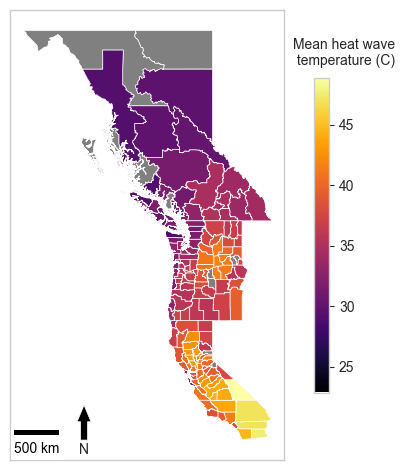

In [35]:
sns.set_style('whitegrid')
fig, ax = plt.subplots()
clean_nw.plot(ax=ax, color='grey')
location_temps.plot(column='temperature_2m_heat', legend=True, ax=ax, cmap='inferno', legend_kwds={'shrink': 0.7})
ax.add_artist(ScaleBar(1, location='lower left')  )
ax.set_yticks([])
ax.set_xticks([])
ax.legend(loc=(1, .83),
          fontsize=15,
          frameon=False,
          title="Mean heat wave \n temperature (C)")

x, y, arrow_length = 0.27, 0.122, 0.1
ax.annotate('N', xy=(x, y), xytext=(x, y-arrow_length),
            arrowprops=dict(facecolor='black', width=5, headwidth=10),
            ha='center', va='center', fontsize=10,
            xycoords=ax.transAxes)


plt.tight_layout()
plt.savefig("/Users/shivyucel/Documents/projects/DPhil/Code_Data/data/results/plots/heat_state_plot_v6.png", dpi=400)


In [67]:
location_temps.to_file('/Users/shivyucel/Documents/projects/DPhil/Code_Data/data/results/plots/state_maps/location_temps.shp')

/var/folders/8g/qp1k_1g91m5f2m9pypxwxdhh0000gn/T/ipykernel_28902/2682032165.py:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  location_temps.to_file('/Users/shivyucel/Documents/projects/DPhil/Code_Data/data/results/plots/state_maps/location_temps.shp')


In [37]:
plot_2_summary = heatwave_control.melt(id_vars=['year', 'state'], value_vars=['workplaces_difference', 'residential_difference', 'transit_difference', 'grocery_pharmacy_difference', 'parks_difference', 'retail_difference'])
plot_2_summary.to_csv('/Users/shivyucel/Documents/projects/DPhil/Code_Data/data/results/plots/year_describe_v5.csv')

In [38]:
plot_3_summary = heatwave_control.melt(id_vars=['temperature_2m_heat', 'state'], value_vars=['workplaces_difference', 'residential_difference', 'transit_difference', 'grocery_pharmacy_difference', 'parks_difference', 'retail_difference'])
plot_3_summary.to_csv('/Users/shivyucel/Documents/projects/DPhil/Code_Data/data/results/plots/scatterplot_v7.csv')

In [40]:
heatwave_control['temperature_2m_heat'].mean()

37.33885783268321